# **EDA Project** - 20.11.25

**Client**: Bonnie Brown - Seller
- Bonnie has houses
- Bonnie want to hight profit in middle class NH (neighborhood)

### 1. Load Libs and Connect to the DB

##### 1.1. Load libs and setup global vars

In [1]:
import os
from dotenv import load_dotenv
# DB lib
from sqlalchemy import create_engine, text
# DS and DV libs
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
# For Geo loc visualization
import plotly
import plotly.express as px
import plotly.io as pio
# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# defines var to use
WORK_DIR = os.getcwd()
DATA_DIR = os.path.join(WORK_DIR, 'data')
CONFIG_DIR = os.path.join(WORK_DIR, 'env')
OUTPUT_DIR = os.path.join(WORK_DIR, 'outputs')
# FILES
ENV_FILE = os.path.join(CONFIG_DIR, 'db_config.env')
# Export the dataframe to a csv file (name here)
EDA_FILE_CSV = os.path.join(DATA_DIR, 'eda.csv')

# Colors palettes :_T -> RGB Tuple version
COLOR_01 = "#36ADA4"
COLOR_01_T = (0.212, 0.678, 0.643)
COLOR_02 = "#CE9032"
COLOR_02_T = (0.808, 0.565, 0.196)
COLOR_03 = "#F77189"
COLOR_03_T = (0.969, 0.443, 0.537)
COLOR_04 = "#32B166"
COLOR_04_T = (0.196, 0.694, 0.4)
COLOR_05 = "#97A431"
COLOR_05_T = (0.592, 0.643, 0.192)
COLOR_06 = "#B41C46"
COLOR_06_T = (0.706, 0.11, 0.275)
COLOR_07 = "#819FC1"
COLOR_07_T = (0.506, 0.624, 0.757)

# load config from env file
load_dotenv(ENV_FILE)

True

##### 1.2. Load Dataset in a CSV file

Skip the connection to db if the csv file is already available

In [ ]:
# read the db credentials and connect
db_string = os.getenv('DB_STRING')
eda_project_db = create_engine(db_string)

In [ ]:
# Test with a query if access ok
query_string = """
    SET SCHEMA 'eda';
    SELECT * FROM king_county_house_sales;
"""
with eda_project_db.connect() as db_conn:
    res = db_conn.execute(text(query_string)) # save the result
    print("nr. of rows" ,len(res.fetchall()))

In [ ]:
# update the query to access the required data from the db
query_string = """
SET SCHEMA 'eda';

SELECT kchs."date", kchs.price,
kchd.bedrooms,
kchd.bathrooms,
kchd.sqft_living,
kchd.sqft_lot,
kchd.floors,
kchd.waterfront,
kchd."view",
kchd."condition",
kchd.grade,
kchd.sqft_above,
kchd.sqft_basement,
kchd.yr_built,
kchd.yr_renovated,
kchd.zipcode,
kchd.lat,
kchd."long",
kchd.sqft_living15,
kchd.sqft_lot15,
kchs.house_id

FROM king_county_house_sales kchs
FULL JOIN king_county_house_details kchd
ON kchs.house_id = kchd.id;
"""

In [ ]:
# Run the query directly inside pandas
# King County Housing Data (kchd)
kchd_df = pd.read_sql(query_string, eda_project_db)
kchd_df.head()

In [ ]:
# Save the result to the csv file without the SQL index
kchd_df.to_csv(EDA_FILE_CSV, index=False)

Start running the cell at here if the data are already available in data folder

In [3]:
# Now load the data from the csv file
kchd_df = pd.read_csv(EDA_FILE_CSV)
# observation (1): our data contains missing values
kchd_df.head(10)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10-13   221900.0       3.0       1.00       1180.0    5650.0     1.0   
1  2014-12-09   538000.0       3.0       2.25       2570.0    7242.0     2.0   
2  2015-02-25   180000.0       2.0       1.00        770.0   10000.0     1.0   
3  2014-12-09   604000.0       4.0       3.00       1960.0    5000.0     1.0   
4  2015-02-18   510000.0       3.0       2.00       1680.0    8080.0     1.0   
5  2014-05-12  1230000.0       4.0       4.50       5420.0  101930.0     1.0   
6  2014-06-27   257500.0       3.0       2.25       1715.0    6819.0     2.0   
7  2015-01-15   291850.0       3.0       1.50       1060.0    9711.0     1.0   
8  2015-04-15   229500.0       3.0       1.00       1780.0    7470.0     1.0   
9  2015-03-12   323000.0       3.0       2.50       1890.0    6560.0     2.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0         NaN   0.0          3  ...      1180.0            0.0      1955   
1         0.0   0.0          3  ...      2170.0          400.0      1951   
2         0.0   0.0          3  ...       770.0            0.0      1933   
3         0.0   0.0          5  ...      1050.0          910.0      1965   
4         0.0   0.0          3  ...      1680.0            0.0      1987   
5         0.0   0.0          3  ...      3890.0         1530.0      2001   
6         0.0   0.0          3  ...      1715.0            NaN      1995   
7         0.0   NaN          3  ...      1060.0            0.0      1963   
8         0.0   0.0          3  ...      1050.0          730.0      1960   
9         0.0   0.0          3  ...      1890.0            0.0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257         1340.0      5650.0   
1       19910.0    98125  47.7210 -122.319         1690.0      7639.0   
2           NaN    98028  47.7379 -122.233         2720.0      8062.0   
3           0.0    98136  47.5208 -122.393         1360.0      5000.0   
4           0.0    98074  47.6168 -122.045         1800.0      7503.0   
5           0.0    98053  47.6561 -122.005         4760.0    101930.0   
6           0.0    98003  47.3097 -122.327         2238.0      6819.0   
7           0.0    98198  47.4095 -122.315         1650.0      9711.0   
8           0.0    98146  47.5123 -122.337         1780.0      8113.0   
9           0.0    98038  47.3684 -122.031         2390.0      7570.0   

     house_id  
0  7129300520  
1  6414100192  
2  5631500400  
3  2487200875  
4  1954400510  
5  7237550310  
6  1321400060  
7  2008000270  
8  2414600126  
9  3793500160  

[10 rows x 21 columns]

### 2. Data Understanding, Exploring and Data Assumptions

##### 2.1. Understanding and Exploring Data

- obs (2): How many entries x cols?

- obs (3): Data consistency e.g.: date as obj not datetime, yr_renovated as float etc.

- obs (4): how many missing/duplicate values we have?

- obs (5): Which cols correlate each other? Are these meaningful for my task?

In [43]:
# Except the date, most of the cols contains numerical values
kchd_df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19206.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007602      0.233863      3.409825      7.657915   
std        0.539683      0.086858      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21145.000000  21597.000000  17749.000000  21597.000000   
mean    1788.596842     291.857224   1970.999676    836.650516  98077.951845   
std      827.759761     442.490863     29.375234   4000.110554     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000  20150.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15      house_id  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213983    1986.620318   12758.283512  4.580474e+09  
std        0.138552      0.140724     685.230472   27274.441950  2.876736e+09  
min       47.155900   -122.519000     399.000000     651.000000  1.000102e+06  
25%       47.471100   -122.328000    1490.000000    5100.000000  2.123049e+09  
50%       47.571800   -122.231000    1840.000000    7620.000000  3.904930e+09  
75%       47.678000   -122.125000    2360.000000   10083.000000  7.308900e+09  
max       47.777600   -121.315000    6210.000000  871200.000000  9.900000e+09

In [44]:
# obs (2 - 3): data inconsistency
kchd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  float64
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  float64
 5   sqft_lot       21597 non-null  float64
 6   floors         21597 non-null  float64
 7   waterfront     19206 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  float64
 12  sqft_basement  21145 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17749 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [45]:
# obs (4) No duplicates but missing values in 4 cols
print(f"Missing values:\n{kchd_df.isna().sum()}")
print()
print(f"Duplicates values:\n{kchd_df.duplicated().value_counts()}")

Missing values:
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
house_id            0
dtype: int64

Duplicates values:
False    21597
Name: count, dtype: int64


<Axes: >

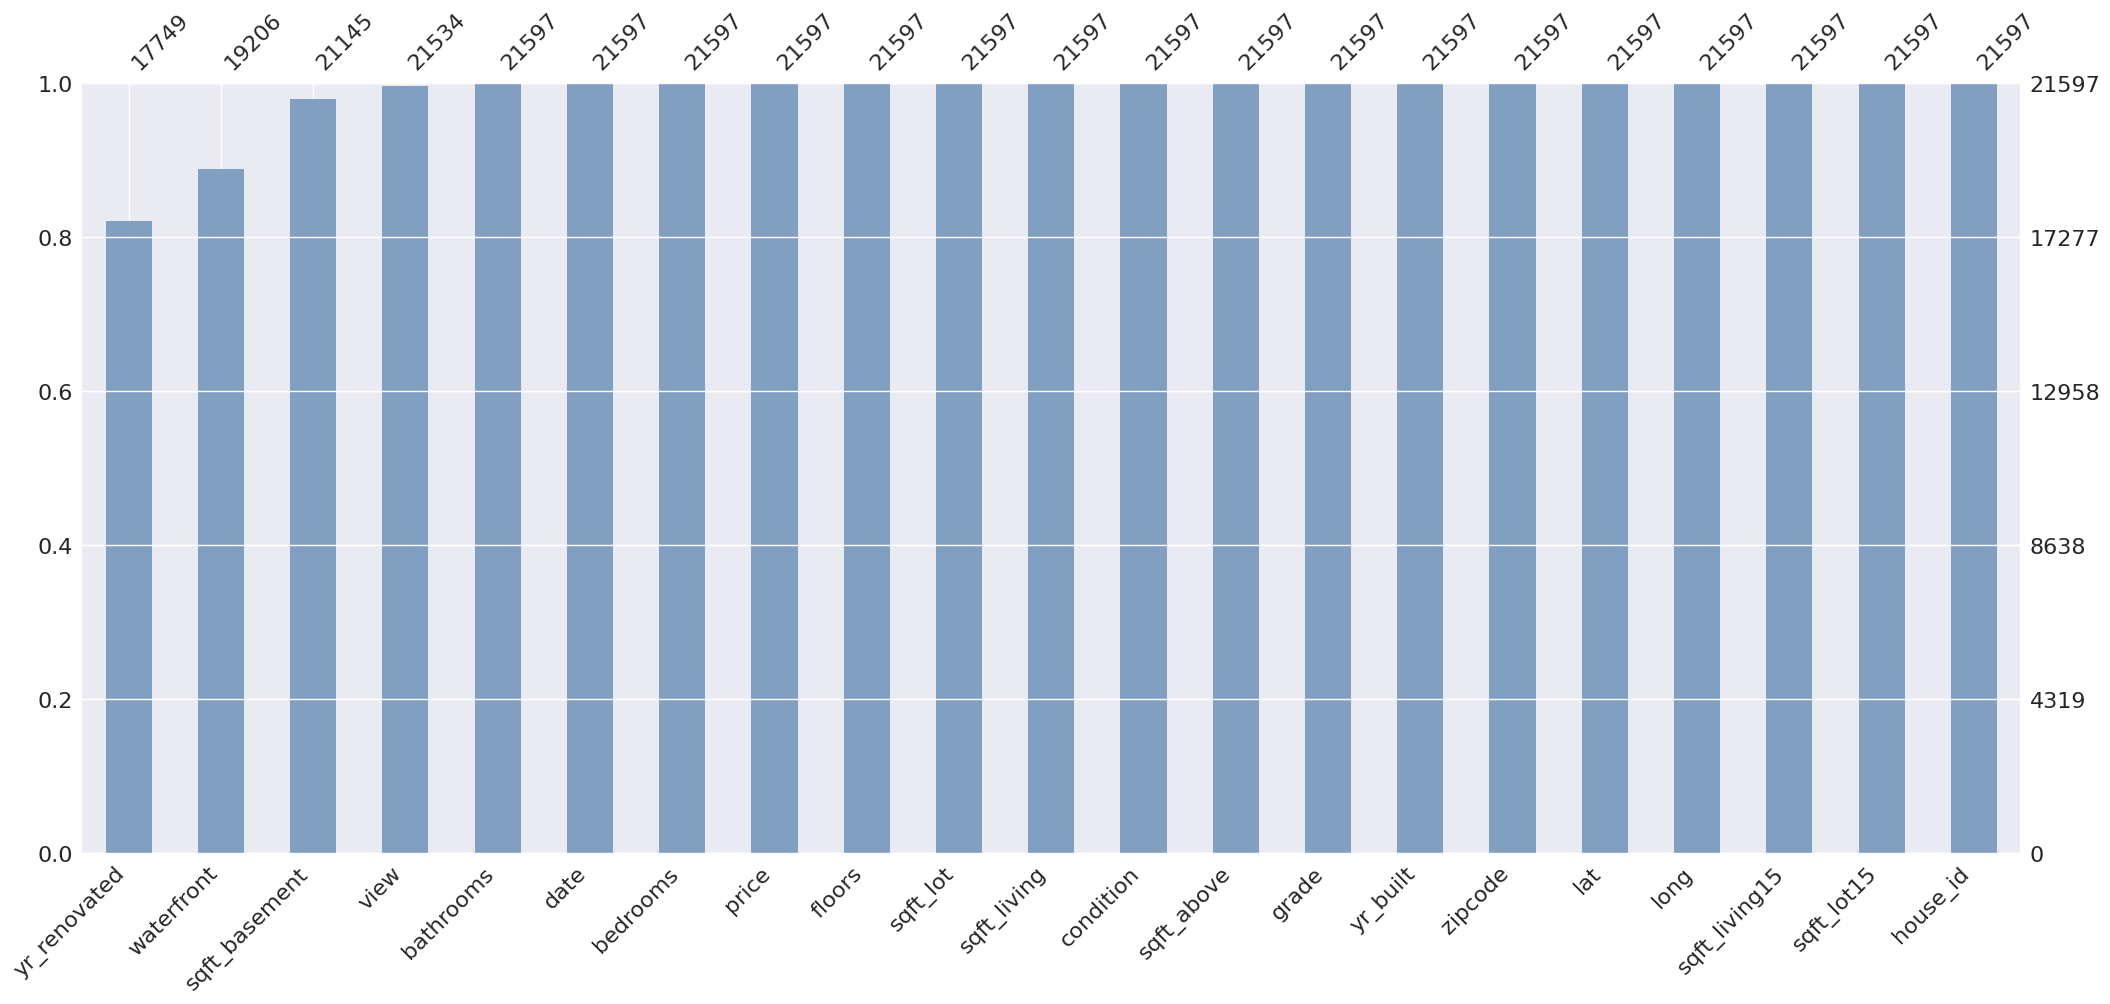

In [46]:
# Explore the data with missingno
# Most values are missing for the renovation year and waterfront
msno.bar(kchd_df, sort='ascending', color=COLOR_07)

In [47]:
# save file
# msno_fig = msno.bar(kchd_df, sort='ascending', color=COLOR_07).get_figure()
# msno_fig.savefig(os.path.join(OUTPUT_DIR, 'msno_barplot_raw_date.png'), bbox_inches='tight')

<Axes: >

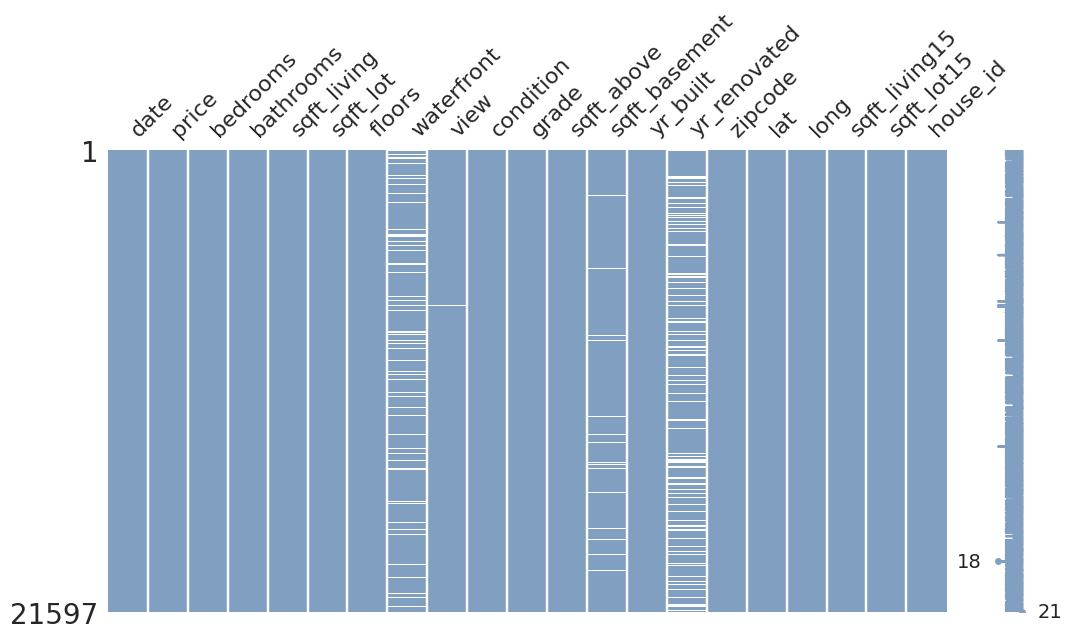

In [48]:
# missing values in cols seems to be randomly present
msno.matrix(kchd_df, figsize=(12, 6), color=COLOR_07_T)

In [4]:
# estimate the percentage of duplicates and missing data
# missing values
total_rows = len(kchd_df)
missing_vals = kchd_df.isna().sum()
missing_pct = (missing_vals / total_rows * 100).round(2)
# Duplicates
dup_vals = kchd_df.duplicated().sum()
dup_pct = (dup_vals / total_rows * 100).round(2)

print("="*45)
print(f"Data Quality Report({total_rows:} rows)")
print("="*45)
print("\nMissing Values per cols (in %):")
print(missing_pct[missing_pct > 0].sort_values(ascending=False))
print(f"\nOverall missing cells: {missing_vals.sum()} / {kchd_df.size} ({missing_vals.sum() / kchd_df.size * 100:.2f}%)")
print(f"\nDuplicated rows: {dup_vals:,} / {total_rows:,} ({dup_pct:.2f}%)")
print("="*45)

Data Quality Report(21597 rows)

Missing Values per cols (in %):
yr_renovated     17.82
waterfront       11.07
sqft_basement     2.09
view              0.29
dtype: float64

Overall missing cells: 6754 / 453537 (1.49%)

Duplicated rows: 0 / 21,597 (0.00%)


##### 2.2. Further Exploration and Assumptions

In [5]:
# Create a copy of the dataset
kchd_copy_df = kchd_df.copy()

In [51]:
# sol (3): convert date to pd.to_datetime
kchd_copy_df['date'] = pd.to_datetime(kchd_copy_df['date'])
# show correlation matrix with pandas (seems to be not easy to interpret)
kchd_copy_df.corr()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date           1.000000 -0.003998 -0.016523  -0.034236    -0.034276  0.006337   
price         -0.003998  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms      -0.016523  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms     -0.034236  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.034276  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot       0.006337  0.089876  0.032471   0.088373     0.173453  1.000000   
floors        -0.022333  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront     0.000425  0.276387 -0.002405   0.067296     0.110233  0.023096   
view          -0.001356  0.395734  0.078523   0.186451     0.282532  0.075298   
condition     -0.050883  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade         -0.039773  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.027638  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.019020  0.324905  0.302527   0.282446     0.434474  0.015526   
yr_built      -0.000279  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.025322  0.129426  0.018456   0.050884     0.055542  0.004498   
zipcode        0.001605 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.032485  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long          -0.007228  0.022037  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.031198  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15     0.002589  0.082845  0.030690   0.088303     0.184342  0.718204   
house_id       0.005385 -0.016772  0.001150   0.005162    -0.012241 -0.131911   

                 floors  waterfront      view  condition  ...  sqft_above  \
date          -0.022333    0.000425 -0.001356  -0.050883  ...   -0.027638   
price          0.256804    0.276387  0.395734   0.036056  ...    0.605368   
bedrooms       0.177944   -0.002405  0.078523   0.026496  ...    0.479386   
bathrooms      0.502582    0.067296  0.186451  -0.126479  ...    0.686668   
sqft_living    0.353953    0.110233  0.282532  -0.059445  ...    0.876448   
sqft_lot      -0.004814    0.023096  0.075298  -0.008830  ...    0.184139   
floors         1.000000    0.021871  0.028436  -0.264075  ...    0.523989   
waterfront     0.021871    1.000000  0.407156   0.017666  ...    0.075441   
view           0.028436    0.407156  1.000000   0.045735  ...    0.166299   
condition     -0.264075    0.017666  0.045735   1.000000  ...   -0.158904   
grade          0.458794    0.087365  0.249727  -0.146896  ...    0.756073   
sqft_above     0.523989    0.075441  0.166299  -0.158904  ...    1.000000   
sqft_basement -0.245160    0.090254  0.276507   0.171037  ...   -0.052393   
yr_built       0.489193   -0.026098 -0.054564  -0.361592  ...    0.424037   
yr_renovated   0.003427    0.087226  0.100795  -0.062034  ...    0.022041   
zipcode       -0.059541    0.031102  0.085277   0.002888  ...   -0.261570   
lat            0.049239   -0.012759  0.006141  -0.015102  ...   -0.001199   
long           0.125943   -0.039888 -0.077894  -0.105878  ...    0.344842   
sqft_living15  0.280102    0.088854  0.279561  -0.093072  ...    0.731767   
sqft_lot15    -0.010722    0.031924  0.073332  -0.003126  ...    0.195077   
house_id       0.018608   -0.004218  0.011592  -0.023803  ...   -0.010799   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
date               -0.019020 -0.000279     -0.025322  0.001605 -0.032485   
price               0.324905  0.053953      0.129426 -0.053402  0.306692   
bedrooms            0.302527  0.155670      0.018456 -0.154092 -0.009951   
bathrooms           0.282446  0.507173      0.050884 -0.204786  0.024280   
sqft_living         0.434474  0.318152      0.055542 -0.199802  0.052155   
sqft_lot            0.015526  0.052946      0.004498 -0.129586 -0.085514   
floors   

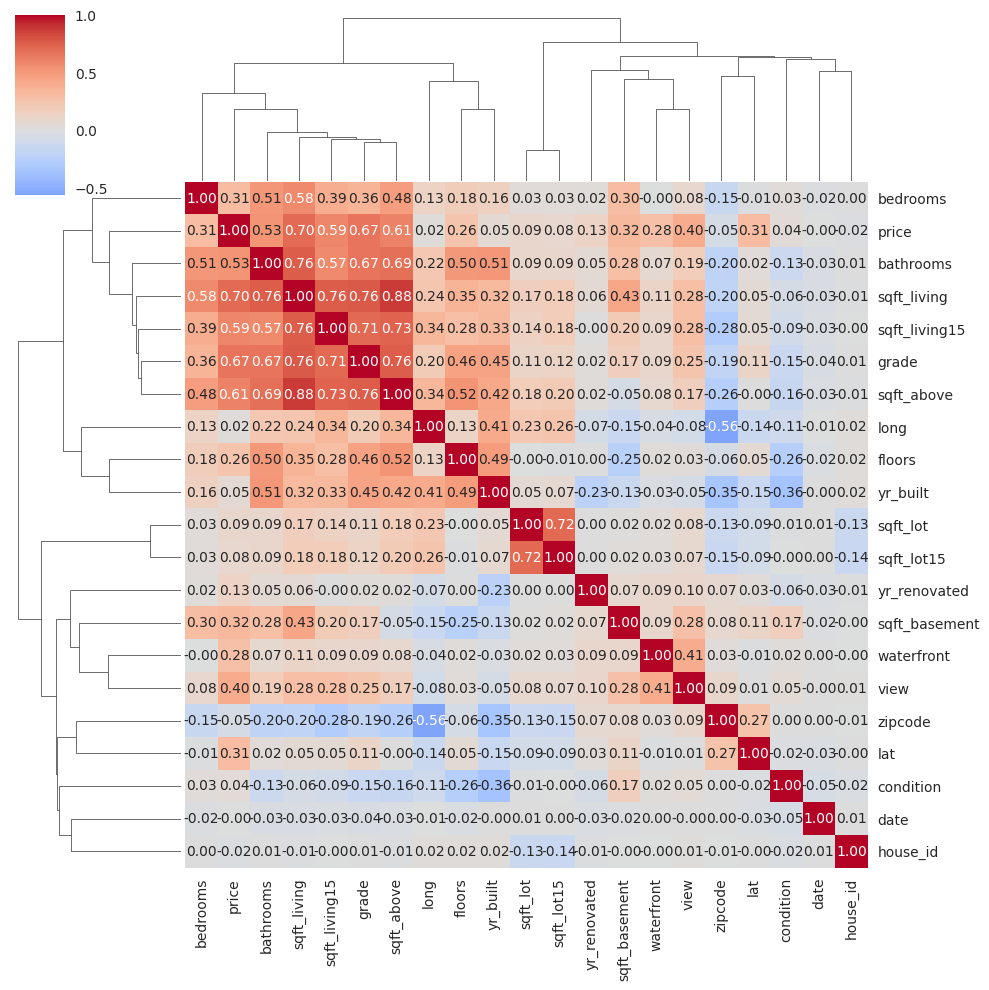

In [52]:
# display correlation with seaborn to get a better overview of the relations
# Since the trend to obs is the price, sqft_living/15, grade seem to have a strong (positive) corr with it
# zipcode and long have a meaningful (negative) corr
sns.clustermap(kchd_copy_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', center=0)
# save image before showing
# plt.gcf()
# plt.savefig(os.path.join(OUTPUT_DIR, 'corr_matrix_with_den_raw.png'), dpi=300)
plt.show()


In [53]:
print("="*35)
print("Correlation score for:")
print("="*35)

print(f"Price vs  Living (sqft): {(kchd_copy_df['price'].corr(kchd_copy_df['sqft_living'])):.2f}")
print(f"Price vs  year built: {(kchd_copy_df['price'].corr(kchd_copy_df['yr_built'])):.2f}")
print(f"Price vs  waterfront: {(kchd_copy_df['price'].corr(kchd_copy_df['waterfront'])):.2f}")
print(f"Price vs  view: {(kchd_copy_df['price'].corr(kchd_copy_df['view'])):.2f}")
print(f"Price vs  zipcode: {(kchd_copy_df['price'].corr(kchd_copy_df['zipcode'])):.2f}")
print(f"Price vs  grade: {(kchd_copy_df['price'].corr(kchd_copy_df['grade'])):.2f}")
print(f"Price vs  living15 (sqft): {(kchd_copy_df['price'].corr(kchd_copy_df['sqft_living15'])):.2f}")
print("="*35)

Correlation score for:
Price vs  Living (sqft): 0.70
Price vs  year built: 0.05
Price vs  waterfront: 0.28
Price vs  view: 0.40
Price vs  zipcode: -0.05
Price vs  grade: 0.67
Price vs  living15 (sqft): 0.59


### 3. Data Cleaning and Data Visualization

With the obs made in 1., we would clean up the data to continue exploration...

In [6]:
# create a new datasets with the meaningful cols found after the 1st assumptions
kchd_copy_df_01 = kchd_copy_df[[
    'date', 'price', 'sqft_living', 'waterfront',
    'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
    'zipcode', 'lat', 'long', 'sqft_living15', 'house_id'
    ]].copy()
kchd_copy_df_01.head()

date     price  sqft_living  waterfront  view  condition  grade  \
0  2014-10-13  221900.0       1180.0         NaN   0.0          3      7   
1  2014-12-09  538000.0       2570.0         0.0   0.0          3      7   
2  2015-02-25  180000.0        770.0         0.0   0.0          3      6   
3  2014-12-09  604000.0       1960.0         0.0   0.0          5      7   
4  2015-02-18  510000.0       1680.0         0.0   0.0          3      8   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257         1340.0   
1      1951       19910.0    98125  47.7210 -122.319         1690.0   
2      1933           NaN    98028  47.7379 -122.233         2720.0   
3      1965           0.0    98136  47.5208 -122.393         1360.0   
4      1987           0.0    98074  47.6168 -122.045         1800.0   

     house_id  
0  7129300520  
1  6414100192  
2  5631500400  
3  2487200875  
4  1954400510

In [7]:
# Condition, view, grade and waterfront can be considered as categorical
# View and water contain missing values that can be easily filled with 0
print(f"Condition: {kchd_copy_df_01.condition.unique()}")
print(f"View: {kchd_copy_df_01['view'].unique()}")
print(f"Waterfront: {kchd_copy_df_01['waterfront'].unique()}")
print(f"Grade: {kchd_copy_df_01.grade.unique()}")

Condition: [3 5 4 1 2]
View: [ 0. nan  3.  4.  2.  1.]
Waterfront: [nan  0.  1.]
Grade: [ 7  6  8 11  9  5 10 12  4  3 13]


Total houses: 21597
Sum of cat: 21597


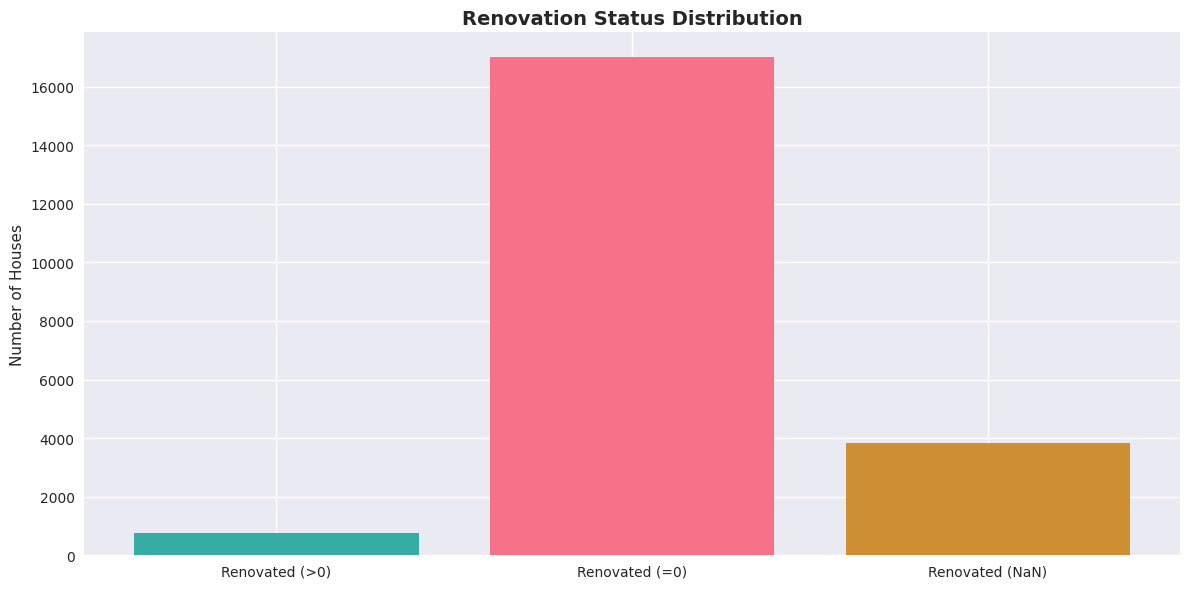

In [8]:
# yr_renovated contain insconsistent dtype and nan
# let explore it: Most of the values are 0, so nan can be easily replaced with 0 to described no renovated houses
# and dtypes can be cast to int
renovated_counts = {
    'Renovated (>0)': (kchd_copy_df_01['yr_renovated'] > 0).sum(),
    'Renovated (=0)': (kchd_copy_df_01['yr_renovated'] == 0).sum(),
    'Renovated (NaN)': kchd_copy_df_01['yr_renovated'].isna().sum()
}
colors = [COLOR_01, COLOR_03, COLOR_02]

print(f"Total houses: {len(kchd_copy_df_01)}")
print(f"Sum of cat: {sum(renovated_counts.values())}")

plt.figure(figsize=(12, 6))
bars = plt.bar(renovated_counts.keys(), renovated_counts.values(), color=colors)

plt.title('Renovation Status Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 3.1. Cleaning Data

In [9]:
# replace nan with 0
kchd_copy_df_01['view'] = kchd_copy_df_01['view'].fillna(0)
kchd_copy_df_01['waterfront'] = kchd_copy_df_01['waterfront'].fillna(0)
kchd_copy_df_01['yr_renovated'] = kchd_copy_df_01['yr_renovated'].fillna(0.0)

# cast to int
kchd_copy_df_01['view'] = kchd_copy_df_01['view'].astype(np.int64)
# Make waterfront int
kchd_copy_df_01['waterfront'] = kchd_copy_df_01['waterfront'].astype(np.int64)
#  dividing by 10 then cast to int
kchd_copy_df_01.loc[kchd_copy_df_01['yr_renovated'] > 0, 'yr_renovated'] /=10
kchd_copy_df_01['yr_renovated'] = kchd_copy_df_01['yr_renovated'].astype(np.int64)

kchd_copy_df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   sqft_living    21597 non-null  float64
 3   waterfront     21597 non-null  int64  
 4   view           21597 non-null  int64  
 5   condition      21597 non-null  int64  
 6   grade          21597 non-null  int64  
 7   yr_built       21597 non-null  int64  
 8   yr_renovated   21597 non-null  int64  
 9   zipcode        21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  float64
 13  house_id       21597 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 2.3+ MB


<Axes: >

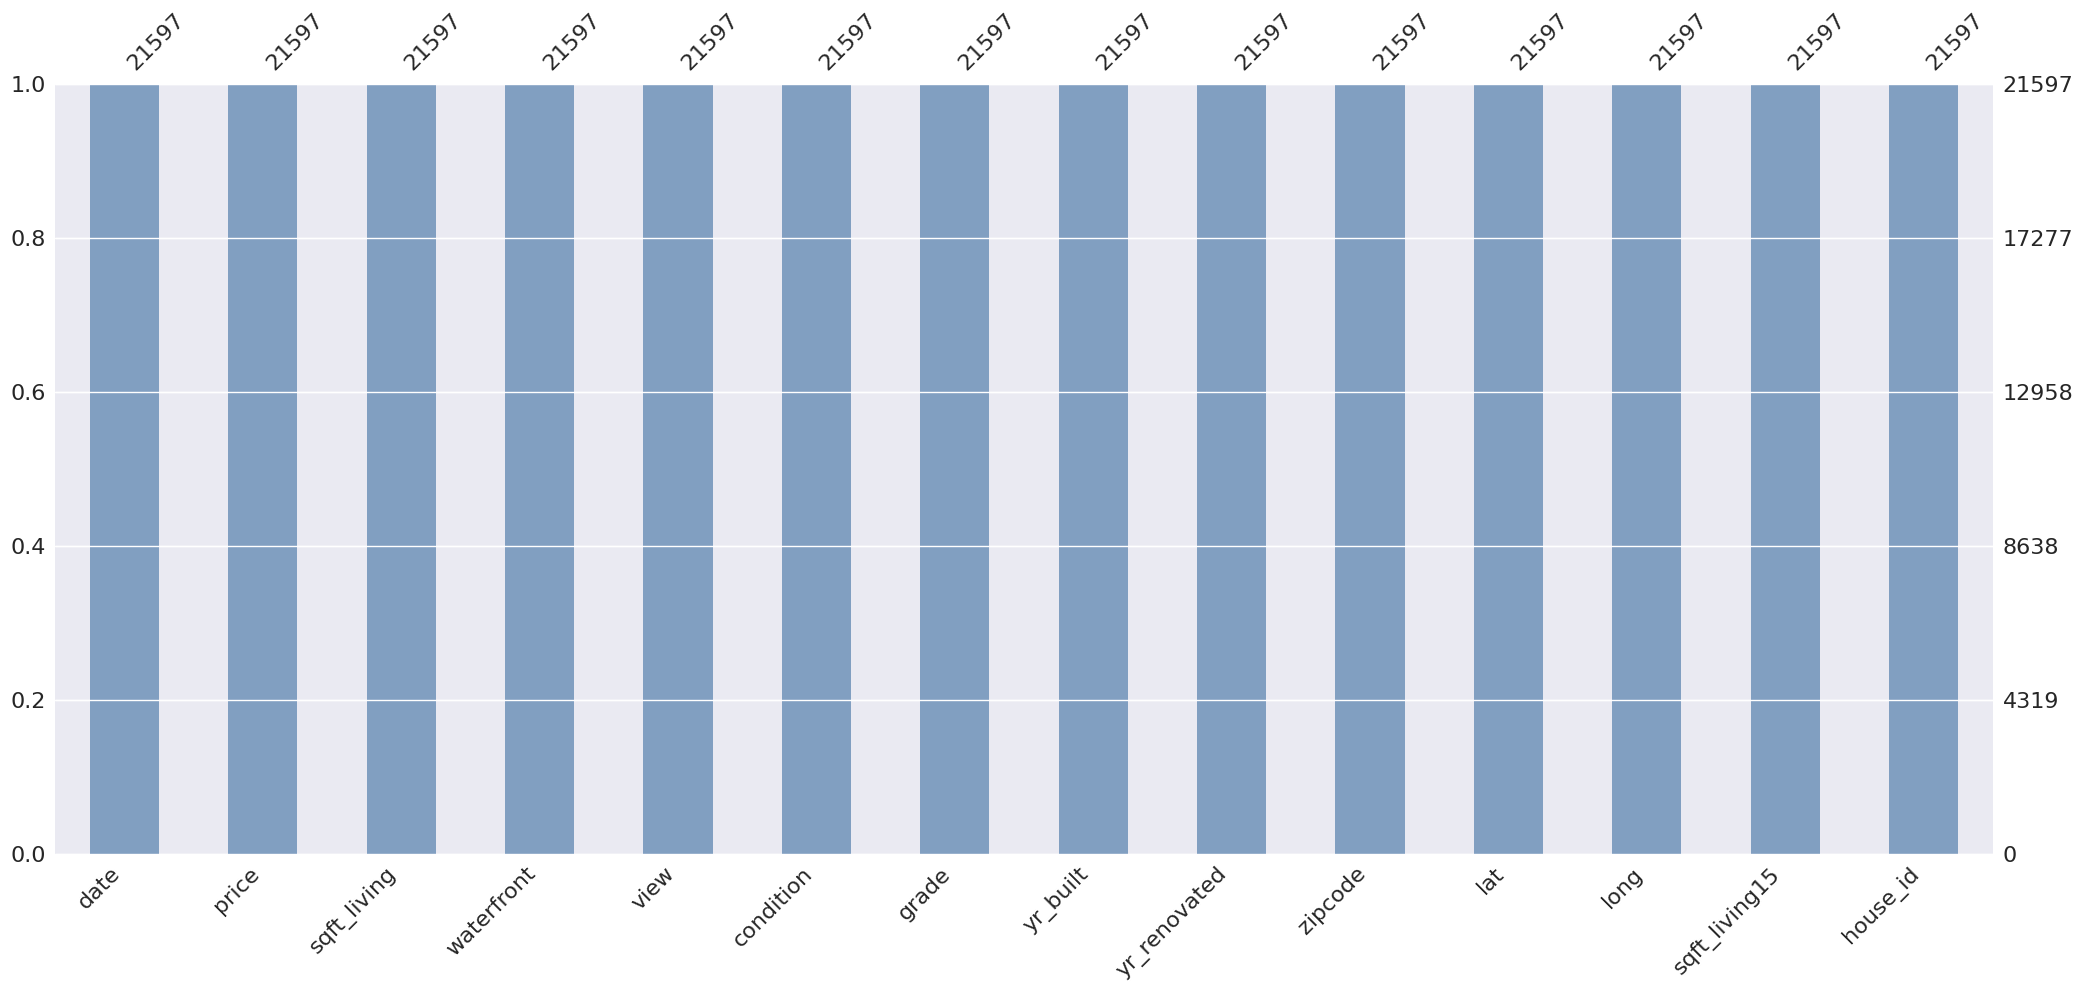

In [10]:
# check again the data with missingno
msno.bar(kchd_copy_df_01, sort='ascending', color=COLOR_07)

##### 3.2. Data Visualization

**Yearly house built**

- Are the house to sell too old or recent?

- Why are there too less renovation for houses?

- How is the house built/renovated correlate with the price?

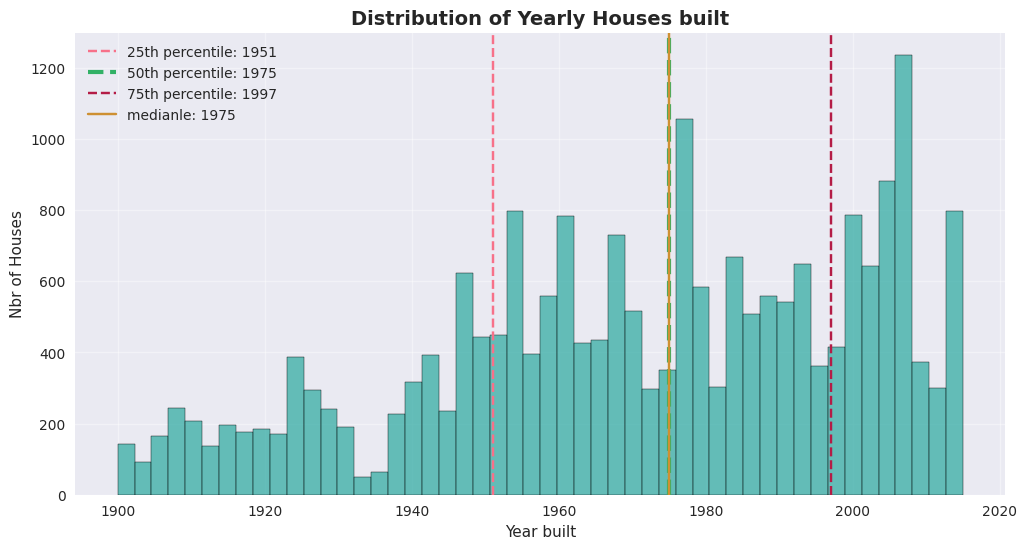

In [11]:
# Distribution of House Built over the years
plt.figure(figsize=(12, 6))
sns.histplot(kchd_copy_df_01['yr_built'], bins=50, color=COLOR_01)

# add percentile plot
pct_25 = kchd_copy_df_01['yr_built'].quantile(0.25)
pct_50 = kchd_copy_df_01['yr_built'].quantile(0.5)
pct_75 = kchd_copy_df_01['yr_built'].quantile(0.75)
median = kchd_copy_df_01['yr_built'].median()

plt.axvline(pct_25, color=COLOR_03, linestyle='--', label=f'25th percentile: {int(pct_25)}')
plt.axvline(pct_50, color=COLOR_04, linewidth=3, linestyle='--', label=f'50th percentile: {int(pct_50)}')
plt.axvline(pct_75, color=COLOR_06, linestyle='--', label=f'75th percentile: {int(pct_75)}')
plt.axvline(median, color=COLOR_02, linestyle='-', label=f'medianle: {int(median)}')

plt.title('Distribution of Yearly Houses built', fontweight='bold', fontsize=14)
plt.xlabel('Year built')
plt.ylabel('Nbr of Houses')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

Outlier thresholds: < 1882 or > 2066
Number of outlier houses: 0 (0.0%)


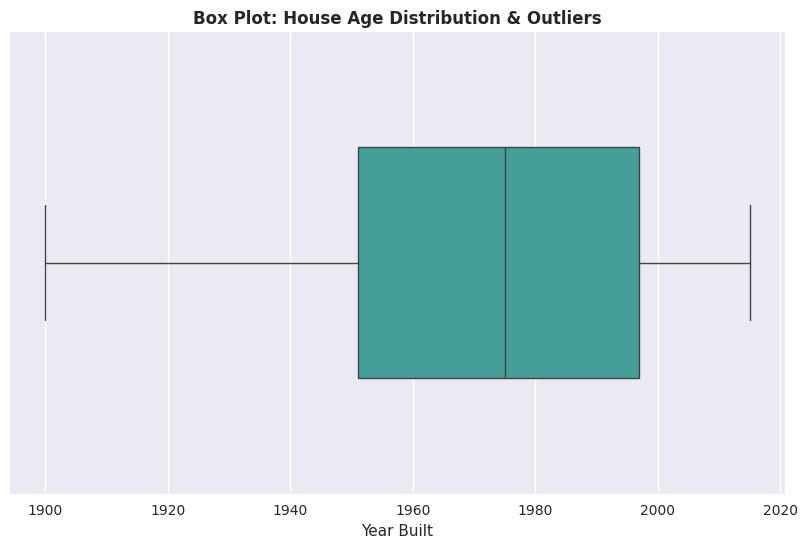

In [12]:
# check outliers year built
plt.figure(figsize=(10, 6))
sns.boxplot(x=kchd_copy_df_01['yr_built'], color=COLOR_01, width=0.5)

# Calculate outlier thresholds using IQR
Q1 = kchd_copy_df_01['yr_built'].quantile(0.25)
Q3 = kchd_copy_df_01['yr_built'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier thresholds: < {int(lower_bound)} or > {int(upper_bound)}")

# Highlight outliers
outliers = kchd_copy_df_01[
    (kchd_copy_df_01['yr_built'] < lower_bound) | 
    (kchd_copy_df_01['yr_built'] > upper_bound)
]
print(f"Number of outlier houses: {len(outliers)} ({len(outliers)/len(kchd_copy_df_01)*100:.1f}%)")

plt.title('Box Plot: House Age Distribution & Outliers', fontweight='bold')
plt.xlabel('Year Built')
plt.show()

In [13]:
# Add a new col to easily find renovated houses
kchd_copy_df_01['renovated'] = np.where(
    kchd_copy_df_01['yr_renovated'] == 0,
    False,
    kchd_copy_df_01['yr_renovated'] > 0
)
kchd_copy_df_01.head()

date     price  sqft_living  waterfront  view  condition  grade  \
0  2014-10-13  221900.0       1180.0           0     0          3      7   
1  2014-12-09  538000.0       2570.0           0     0          3      7   
2  2015-02-25  180000.0        770.0           0     0          3      6   
3  2014-12-09  604000.0       1960.0           0     0          5      7   
4  2015-02-18  510000.0       1680.0           0     0          3      8   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257         1340.0   
1      1951          1991    98125  47.7210 -122.319         1690.0   
2      1933             0    98028  47.7379 -122.233         2720.0   
3      1965             0    98136  47.5208 -122.393         1360.0   
4      1987             0    98074  47.6168 -122.045         1800.0   

     house_id  renovated  
0  7129300520      False  
1  6414100192       True  
2  5631500400      False  
3  2487200875      False  
4  1954400510      False

/tmp/ipykernel_190851/3092354610.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Not Renovated\n(N = {counts[False]:,})',


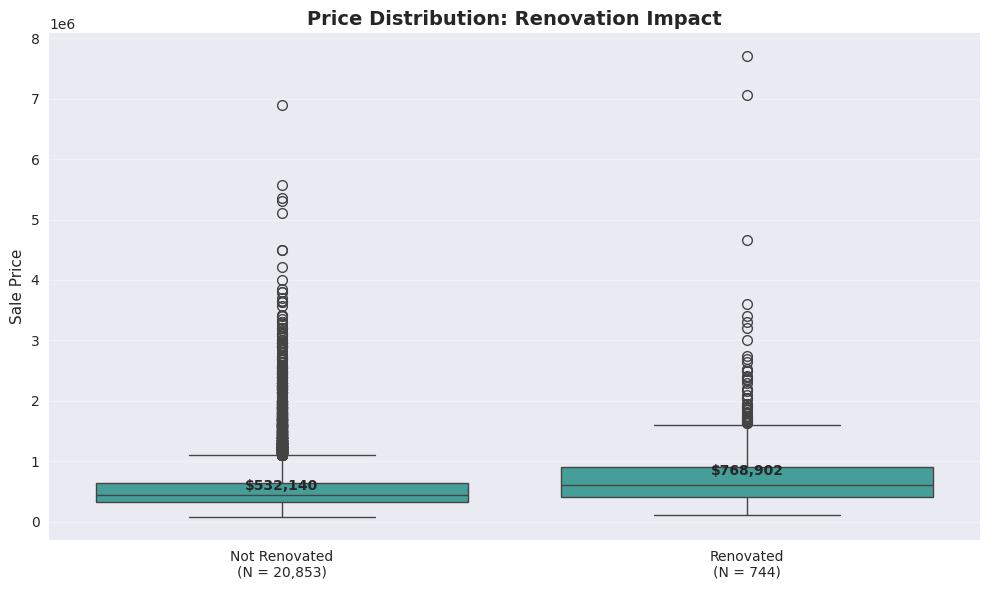

count           mean            std       min       25%  \
renovated                                                              
False      20853.0  532140.319858  351894.730306   78000.0  320000.0   
True         744.0  768901.892473  627125.794045  110000.0  412250.0   

                50%       75%        max  
renovated                                 
False      449000.0  635000.0  6890000.0  
True       607502.0  900000.0  7700000.0

In [14]:
# Plot the trend of the price for (not) renovated houses
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=kchd_copy_df_01, x='renovated', y='price', color=COLOR_01)

# Add count labels on x-axis
counts = kchd_copy_df_01['renovated'].value_counts()
ax.set_xticklabels([f'Not Renovated\n(N = {counts[False]:,})', 
                    f'Renovated\n(N = {counts[True]:,})'])

plt.title('Price Distribution: Renovation Impact', fontweight='bold', fontsize=14)
plt.xlabel('')
plt.ylabel('Sale Price')
plt.grid(axis='y', alpha=0.3)

# Add mean price annotations
means = kchd_copy_df_01.groupby('renovated')['price'].mean()
for i, (status, mean_price) in enumerate(means.items()):
    ax.text(i, mean_price, f'${mean_price:,.0f}', 
            ha='center', fontweight='bold') #, color=COLOR_06)

plt.tight_layout()
plt.show()

# Print summary stats
# obviously renovated house have high cost than not renovated
kchd_copy_df_01.groupby('renovated')['price'].describe()

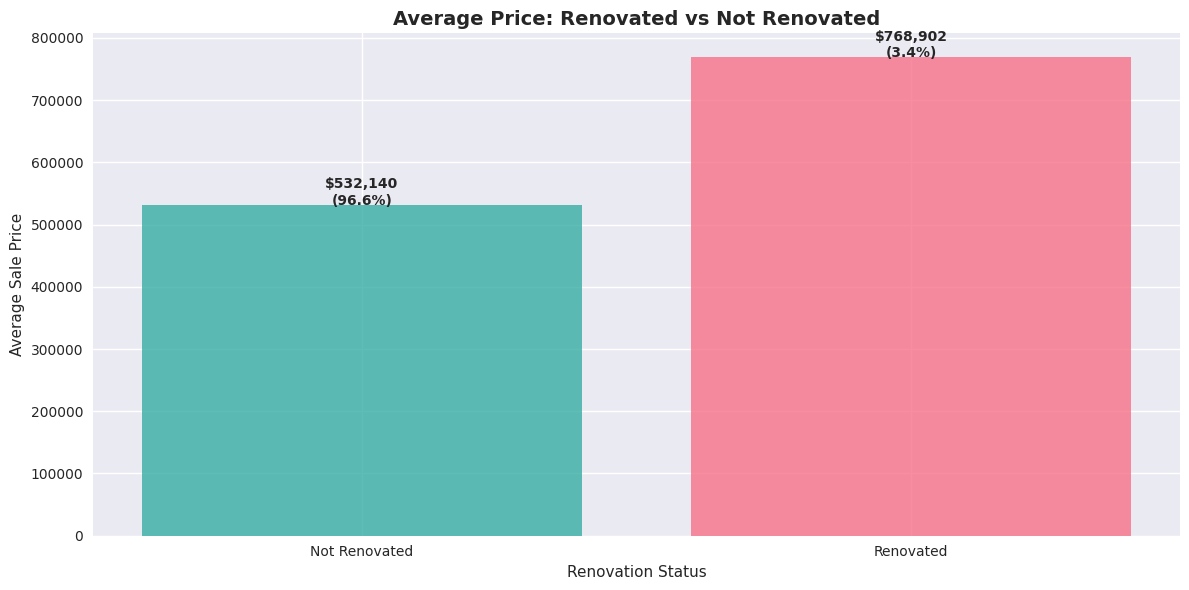

Renovated houses sell for $236,762 more on average


In [15]:
# Calculate stats
price_renov_stats = kchd_copy_df_01.groupby('renovated').agg({
    'price': ['mean', 'median', 'count']
}).round(0)
price_renov_stats.columns = ['Mean_Price', 'Median_Price', 'Count']

plt.figure(figsize=(12, 6))
bars = plt.bar(price_renov_stats.index.astype(str), price_renov_stats['Mean_Price'], 
               color=[COLOR_01, COLOR_03], alpha=0.8)

plt.title('Average Price: Renovated vs Not Renovated', fontweight='bold', fontsize=14)
plt.ylabel('Average Sale Price')
plt.xlabel('Renovation Status')

# Add percentage text
total = price_renov_stats['Count'].sum()
for i, (idx, row) in enumerate(price_renov_stats.iterrows()):
    plt.text(i, row['Mean_Price'], 
             f'${row["Mean_Price"]:,.0f}\n({row["Count"]/total*100:.1f}%)', 
             ha='center', fontweight='bold')

plt.xticks([0, 1], ['Not Renovated', 'Renovated'])
plt.tight_layout()
plt.show()

# So client may tend to look at not renovated houses because they cost less
print(f"Renovated houses sell for ${price_renov_stats.loc[True, 'Mean_Price'] - price_renov_stats.loc[False, 'Mean_Price']:,.0f} more on average")

**Square Footage (House), position vs Price**

- How does the price correlate with the square footage?

- Overall grade trend with price?

- trend of a house cost with the house view and location?

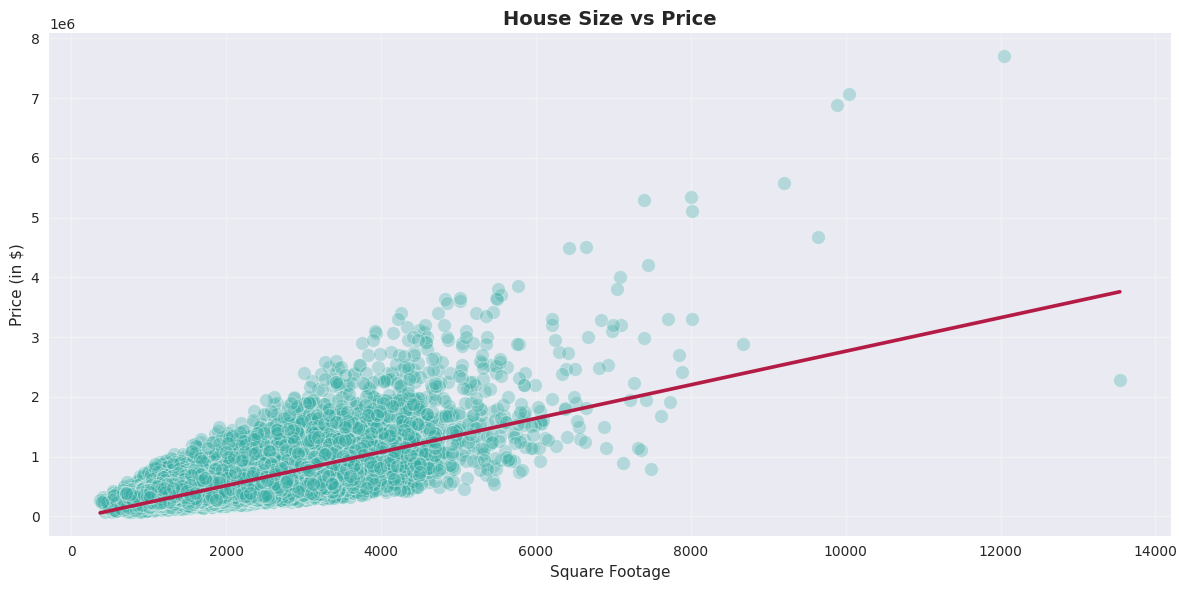

In [16]:
plt.figure(figsize=(12, 6))


sns.scatterplot(data=kchd_copy_df_01, x='sqft_living', y='price', color=COLOR_01, s=100, alpha=0.3)
sns.regplot(data=kchd_copy_df_01, x='sqft_living', y='price', scatter=False, color=COLOR_06, ci=None)
plt.title('House Size vs Price', fontweight='bold', fontsize=14)
plt.xlabel('Square Footage')
plt.ylabel('Price (in $)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

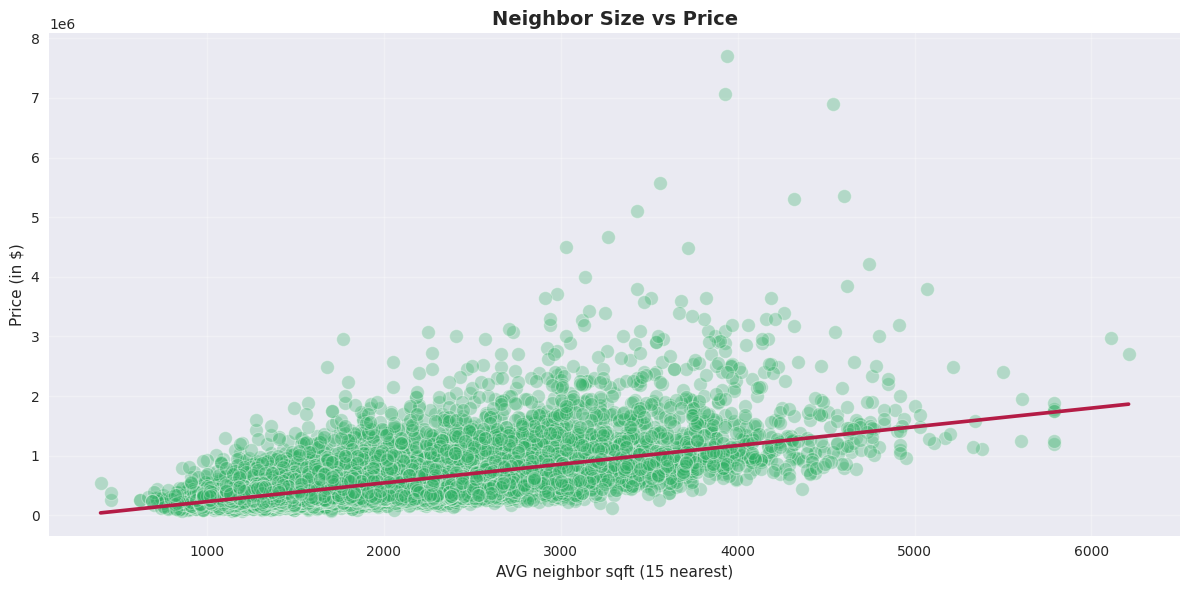

In [17]:
# neighbor Size vs price
plt.figure(figsize=(12, 6))


sns.scatterplot(data=kchd_copy_df_01, x='sqft_living15', y='price', color=COLOR_04, s=100, alpha=0.3)
sns.regplot(data=kchd_copy_df_01, x='sqft_living15', y='price', scatter=False, color=COLOR_06, ci=None)
plt.title('Neighbor Size vs Price', fontweight='bold', fontsize=14)
plt.xlabel('AVG neighbor sqft (15 nearest)')
plt.ylabel('Price (in $)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

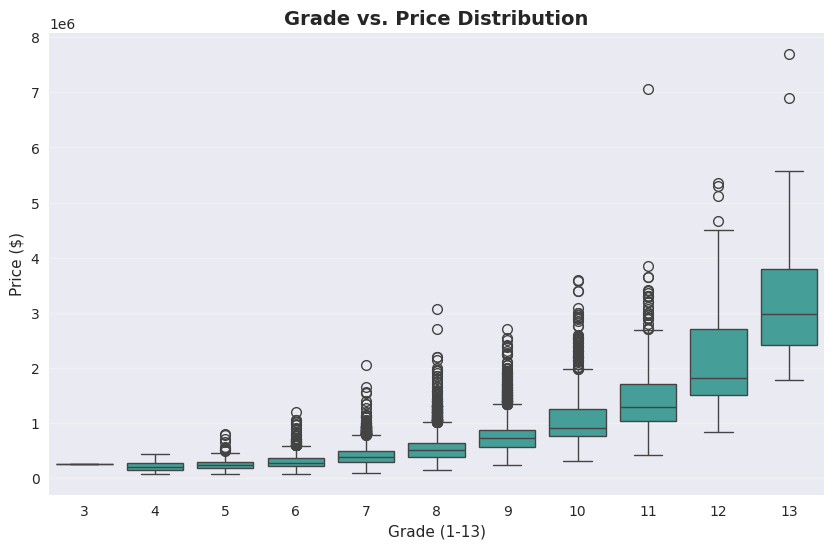

In [18]:
# Overall grade vs price
plt.figure(figsize=(10, 6))
sns.boxplot(data=kchd_copy_df_01, x='grade', y='price', color=COLOR_01)
plt.title('Grade vs. Price Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Grade (1-13)')
plt.ylabel('Price ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

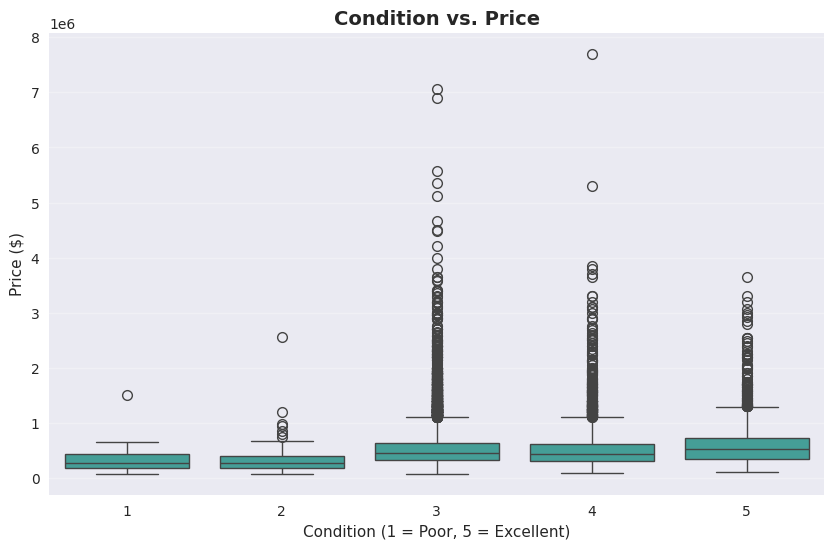

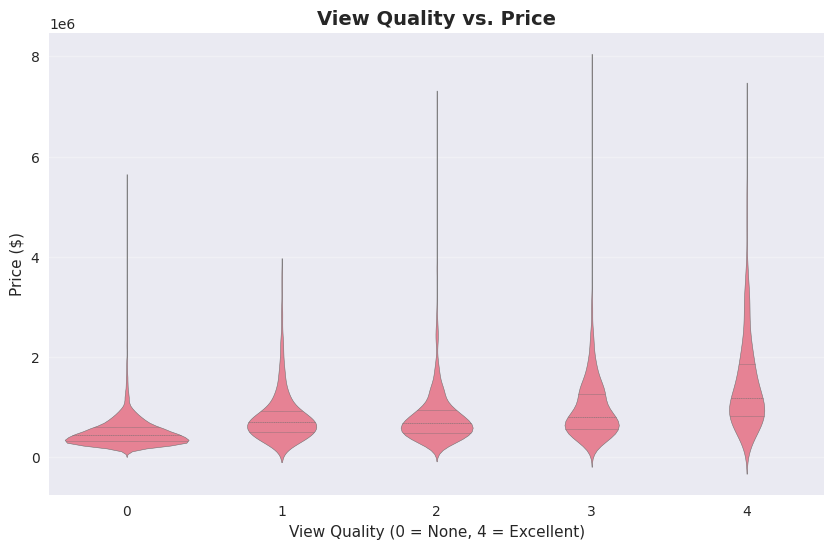

count          mean           std       min       25%  \
waterfront                                                            
0           21451.0  5.322862e+05  3.428082e+05   78000.0  320000.0   
1             146.0  1.717215e+06  1.145385e+06  285000.0  827500.0   

                  50%        75%        max  
waterfront                                   
0            450000.0   640000.0  7700000.0  
1           1510000.0  2282500.0  7060000.0

In [19]:
# House condition vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=kchd_copy_df_01, x='condition', y='price', color=COLOR_01)
plt.title('Condition vs. Price', fontweight='bold', fontsize=14)
plt.xlabel('Condition (1 = Poor, 5 = Excellent)')
plt.ylabel('Price ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

# View quality vs price
plt.figure(figsize=(10, 6))
sns.violinplot(data=kchd_copy_df_01, x='view', y='price', 
               inner='quartile', color=COLOR_03)
plt.title('View Quality vs. Price', fontweight='bold', fontsize=14)
plt.xlabel('View Quality (0 = None, 4 = Excellent)')
plt.ylabel('Price ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Stats waterfront vs Price
kchd_copy_df_01.groupby('waterfront')['price'].describe()

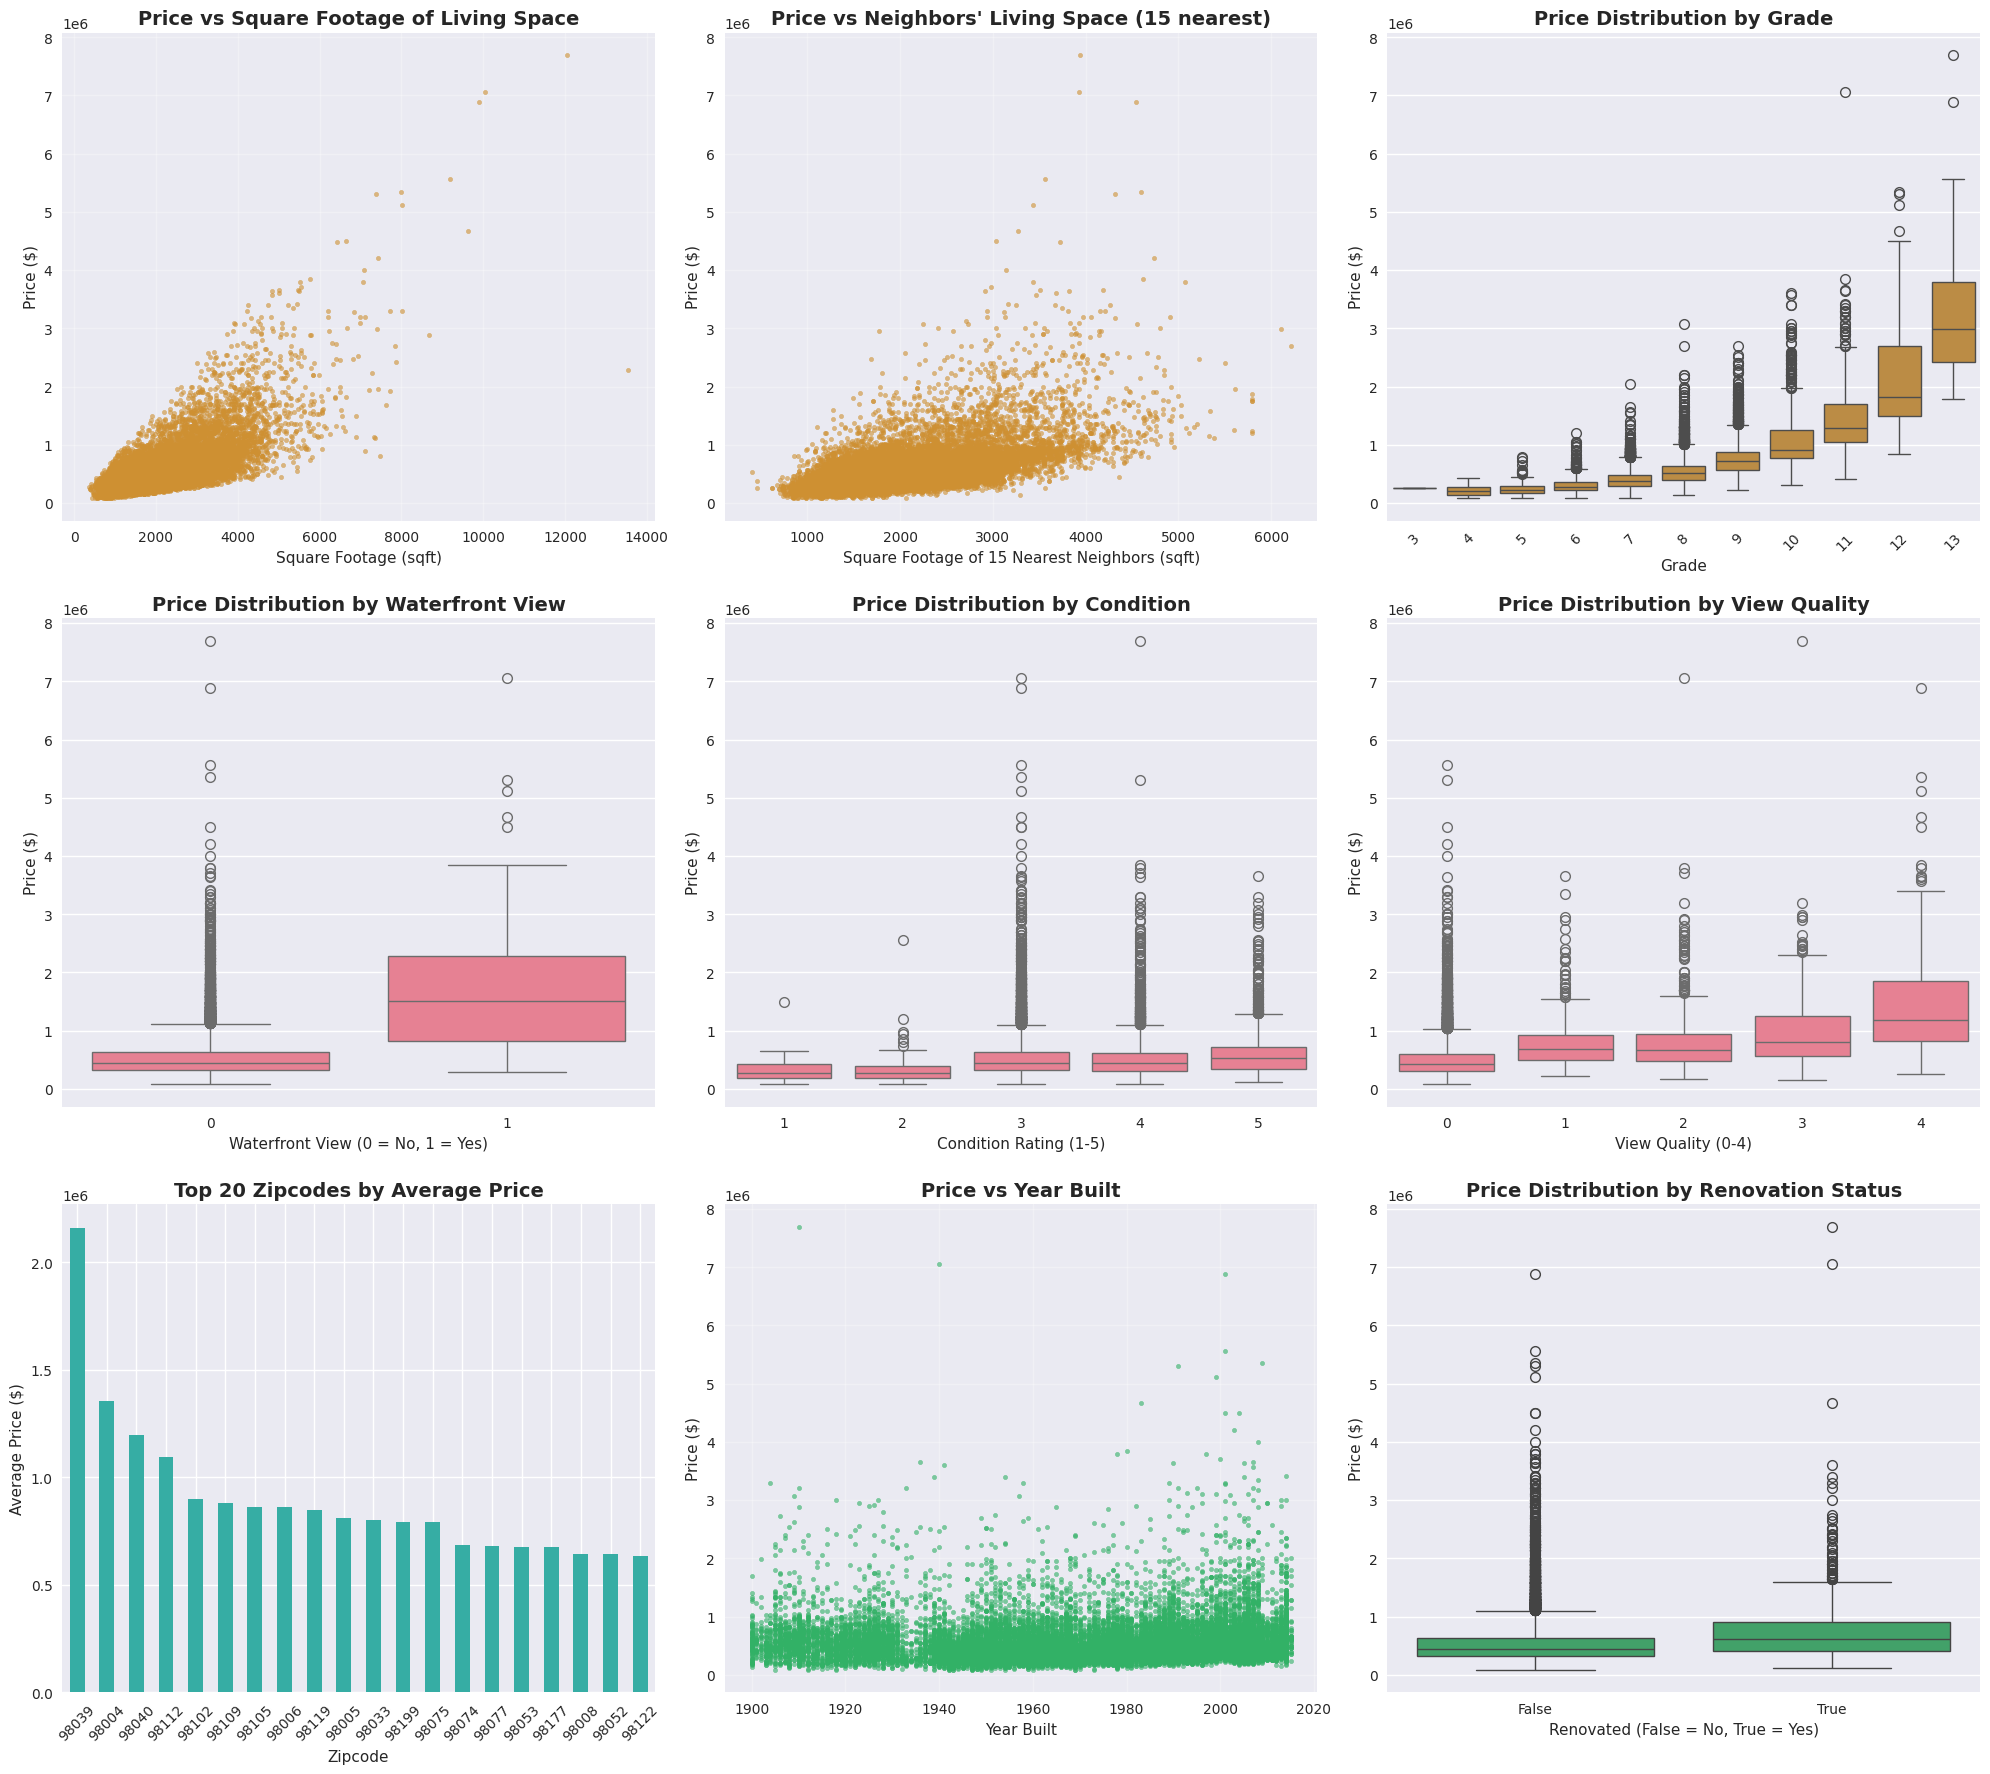

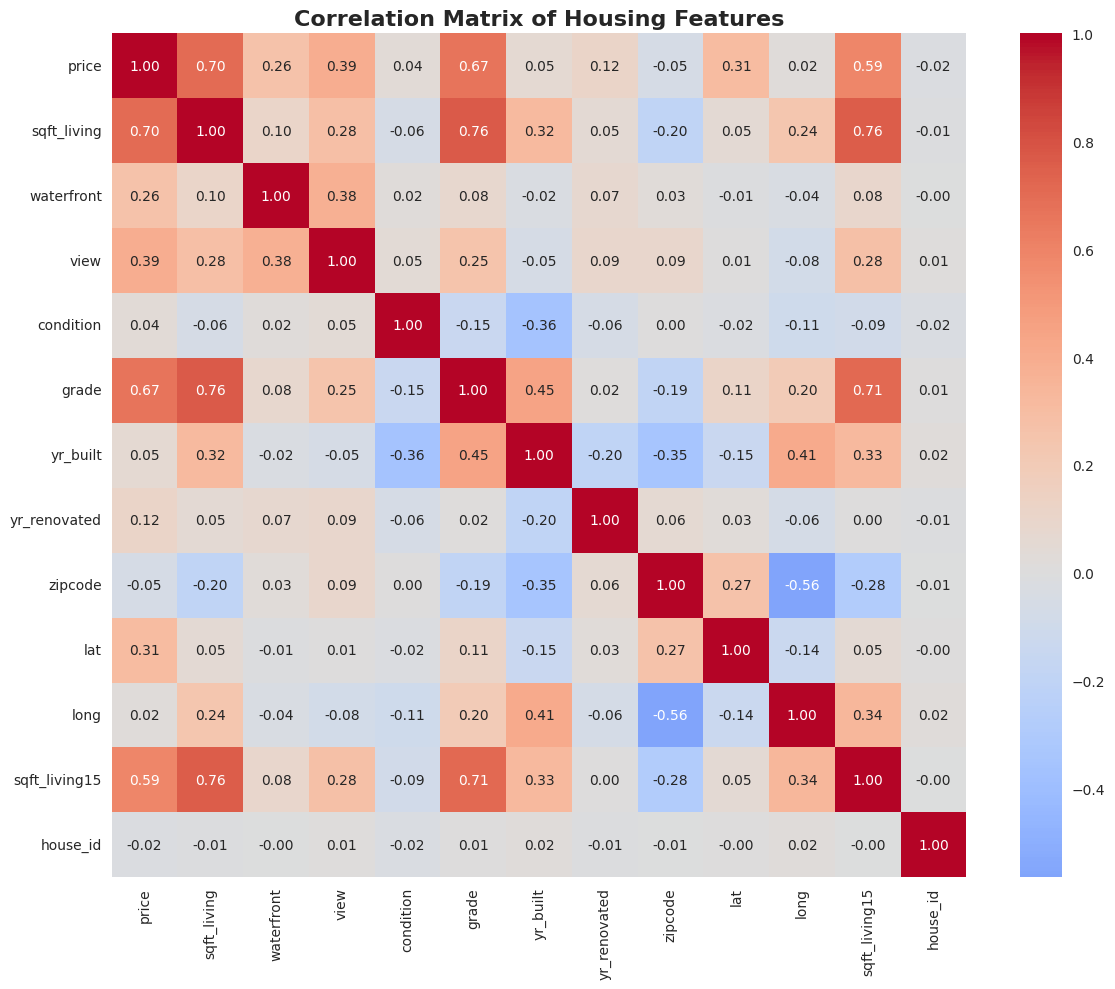

In [20]:
# All in one
# Create subplots for all the visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# 1. sqft_living vs price
axes[0].scatter(kchd_copy_df_01['sqft_living'], kchd_copy_df_01['price'], alpha=0.6, s=10, color=COLOR_02)
axes[0].set_title('Price vs Square Footage of Living Space', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Square Footage (sqft)')
axes[0].set_ylabel('Price ($)')
axes[0].grid(alpha=0.3)

# 2. sqft_living15 vs price
axes[1].scatter(kchd_copy_df_01['sqft_living15'], kchd_copy_df_01['price'], alpha=0.6, s=10, color=COLOR_02)
axes[1].set_title('Price vs Neighbors\' Living Space (15 nearest)', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Square Footage of 15 Nearest Neighbors (sqft)')
axes[1].set_ylabel('Price ($)')
axes[1].grid(alpha=0.3)

# 3. grade vs price (box plot would be better for categorical-like data)
grade_order = sorted(kchd_copy_df_01['grade'].unique())
sns.boxplot(data=kchd_copy_df_01, x='grade', y='price', ax=axes[2], order=grade_order, color=COLOR_02)
axes[2].set_title('Price Distribution by Grade', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Grade')
axes[2].set_ylabel('Price ($)')
axes[2].tick_params(axis='x', rotation=45)

# 4. waterfront vs price (box plot for binary categorical)
sns.boxplot(data=kchd_copy_df_01, x='waterfront', y='price', ax=axes[3])
axes[3].set_title('Price Distribution by Waterfront View', fontweight='bold', fontsize=14)
axes[3].set_xlabel('Waterfront View (0 = No, 1 = Yes)')
axes[3].set_ylabel('Price ($)')

# 5. condition vs price (box plot)
condition_order = sorted(kchd_copy_df_01['condition'].unique())
sns.boxplot(data=kchd_copy_df_01, x='condition', y='price', ax=axes[4], order=condition_order)
axes[4].set_title('Price Distribution by Condition', fontweight='bold', fontsize=14)
axes[4].set_xlabel('Condition Rating (1-5)')
axes[4].set_ylabel('Price ($)')

# 6. view vs price (box plot)
view_order = sorted(kchd_copy_df_01['view'].unique())
sns.boxplot(data=kchd_copy_df_01, x='view', y='price', ax=axes[5], order=view_order)
axes[5].set_title('Price Distribution by View Quality', fontweight='bold', fontsize=14)
axes[5].set_xlabel('View Quality (0-4)')
axes[5].set_ylabel('Price ($)')

# 7. zipcode vs price (since zipcode has many values, we'll use a bar plot with top zipcodes)
# Get top 20 zipcodes by average price to make it readable
top_zipcodes = kchd_copy_df_01.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(20)
top_zipcodes.plot(kind='bar', ax=axes[6], color=COLOR_01)
axes[6].set_title('Top 20 Zipcodes by Average Price', fontweight='bold', fontsize=14)
axes[6].set_xlabel('Zipcode')
axes[6].set_ylabel('Average Price ($)')
axes[6].tick_params(axis='x', rotation=45)

# 8. Additional plot: yr_built vs price (since you have the data)
axes[7].scatter(kchd_copy_df_01['yr_built'], kchd_copy_df_01['price'], alpha=0.6, s=10, color=COLOR_04)
axes[7].set_title('Price vs Year Built', fontweight='bold', fontsize=14)
axes[7].set_xlabel('Year Built')
axes[7].set_ylabel('Price ($)')
axes[7].grid(alpha=0.3)

# 9. Additional plot: renovated vs price
sns.boxplot(data=kchd_copy_df_01, x='renovated', y='price', ax=axes[8], color=COLOR_04)
axes[8].set_title('Price Distribution by Renovation Status', fontweight='bold', fontsize=14)
axes[8].set_xlabel('Renovated (False = No, True = Yes)')
axes[8].set_ylabel('Price ($)')

# Remove empty subplot if any
for i in range(9, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
# plt.gcf()
# plt.savefig(os.path.join(OUTPUT_DIR, 'all_fig_in_one_plot.png'), dpi=300)
plt.show()


# Correlation heatmap to see relationships between all variables
plt.figure(figsize=(12, 10))
numeric_cols = kchd_copy_df_01.select_dtypes(include=[np.number]).columns
correlation_matrix = kchd_copy_df_01[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Housing Features', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

##### 3.3. Further Hypothesis

In [21]:
# Ensure another copy
bonnie_df = kchd_copy_df_01.copy()

In [22]:
# price distributions to find/define categories
price_stats = kchd_copy_df_01['price'].describe()

# Define price categories
# price tiers based on quantiles
price_quantiles = bonnie_df['price'].quantile([0.1, 0.33,  0.4, 0.6, 0.9])

def categorize_price(price):
    if price <= price_quantiles[0.1]:
        return 'Budget'
    elif price <= price_quantiles[0.33]:
        return 'Lower-Middle'
    elif price <= price_quantiles[0.4]:
        return 'Middle-Class-1'
    elif price <= price_quantiles[0.6]:
        return 'Middle-Class-2'  # Bonnie's target
    elif price <= price_quantiles[0.9]:
        return 'Upper-Middle'
    else:
        return 'Luxury'

In [23]:
bonnie_df['price_tier'] = bonnie_df['price'].apply(categorize_price)

# Verify distribution
tier_counts = bonnie_df['price_tier'].value_counts()
print("Price Tier Distribution:")
print(tier_counts)
print(f"\nMiddle-Class price range: ${price_quantiles[0.33]:,.0f} - ${price_quantiles[0.6]:,.0f}")

Price Tier Distribution:
price_tier
Upper-Middle      6475
Lower-Middle      5050
Middle-Class-2    4324
Budget            2164
Luxury            2159
Middle-Class-1    1425
Name: count, dtype: int64

Middle-Class price range: $360,000 - $519,000


In [24]:
# Focus on middle-class houses
middle_class = bonnie_df[(bonnie_df['price_tier'] == 'Middle-Class-1') | (bonnie_df['price_tier'] == 'Middle-Class-2')].copy()
middle_class['value_score'] = (
    middle_class['grade'] * 0.3 +
    middle_class['condition'] * 0.2 +
    middle_class['view'] * 0.2 +
    (middle_class['waterfront'] * 2) * 0.3
)
print("="*60)
print("MIDDLE-CLASS MARKET ANALYSIS")
print("="*60)

# Which zipcodes dominate middle-class?
zipcode_mc = middle_class.groupby('zipcode').agg({
    'price': ['count', 'mean', 'median'],
    'waterfront': 'mean',
    'renovated': 'sum',
    'condition': 'mean',
    'view': 'mean'
}).round(2)

print("\nTop 5 Middle-Class Zipcodes (by volume):")

zipcode_mc.columns = ['count', 'avg_price', 'median_price', 'waterfront_pct', 
                      'renovated_count', 'avg_condition', 'avg_view']
zipcode_mc = zipcode_mc.sort_values('count', ascending=False)

zipcode_mc.head()

MIDDLE-CLASS MARKET ANALYSIS

Top 5 Middle-Class Zipcodes (by volume):


count  avg_price  median_price  waterfront_pct  renovated_count  \
zipcode                                                                    
98034      300  438291.26      439000.0             0.0                1   
98133      231  422845.93      415000.0             0.0               10   
98125      200  428985.25      426500.0             0.0                4   
98115      199  446892.25      445500.0             0.0               11   
98117      198  447741.56      450250.0             0.0                4   

         avg_condition  avg_view  
zipcode                           
98034             3.45      0.04  
98133             3.71      0.03  
98125             3.43      0.06  
98115             3.30      0.08  
98117             3.43      0.04

In [25]:
print("\nTop Middle-Class Waterfront (by price):")
# Waterfront premium in middle-class
waterfront_premium = middle_class.groupby('waterfront')['price'].mean()
waterfront_premium.head()


Top Middle-Class Waterfront (by price):


waterfront
0    435740.753005
1    435362.500000
Name: price, dtype: float64

In [26]:
def get_top_houses(df, tier, n=10):
    """Get top n houses in specific tier, sorted by profit potential"""
    subset = df[df['price_tier'] == tier].copy()
    # Profit potential = price relative to size and grade
    subset['price_efficiency'] = subset['price'] / (subset['sqft_living'] * subset['grade'])
    return subset.nsmallest(n, 'price_efficiency') 

In [27]:
# Bonnie's interest: Middle-Class and Luxury for high profit
top_middle_1 = get_top_houses(bonnie_df, 'Middle-Class-1', 5)
top_middle_2 = get_top_houses(bonnie_df, 'Middle-Class-2', 5)
top_luxury = get_top_houses(bonnie_df, 'Luxury', 5)

In [28]:
# MC (1)
print("="*90)
print("TOP 5 MIDDLE-CLASS (1) HOUSES (Best Profit Potential)")
print("="*90)
print(top_middle_1[['house_id', 'price', 'sqft_living', 'zipcode', 
                  'waterfront', 'view', 'condition', 'renovated']].to_string())

TOP 5 MIDDLE-CLASS (1) HOUSES (Best Profit Potential)
         house_id     price  sqft_living  zipcode  waterfront  view  condition  renovated
21086  2867300190  363000.0       3753.0    98023           0     0          3      False
373    7683900200  380000.0       3450.0    98023           0     0          3      False
19598  3211260120  370000.0       3230.0    98092           0     0          3      False
8360   2212600100  370000.0       3150.0    98092           0     0          4      False
13249  2011400021  392000.0       3740.0    98198           0     0          3      False


In [29]:
# MC (2)
print("="*90)
print("TOP 5 MIDDLE-CLASS (2) HOUSES (Best Profit Potential)")
print("="*90)
print(top_middle_2[['house_id', 'price', 'sqft_living', 'zipcode', 
                  'waterfront', 'view', 'condition', 'renovated']].to_string())

TOP 5 MIDDLE-CLASS (2) HOUSES (Best Profit Potential)
         house_id     price  sqft_living  zipcode  waterfront  view  condition  renovated
8337   5152700120  452000.0       5067.0    98003           0     2          3      False
19715  2867300030  442000.0       4168.0    98023           0     0          3      False
10951  5152700060  465000.0       4250.0    98003           0     3          3      False
21356  6169901185  490000.0       4460.0    98119           0     2          3      False
4824   3211270170  404000.0       4060.0    98092           0     0          3      False


In [30]:
# Luxury
print("="*90)
print("TOP 5 LUXURY HOUSES (High-End Market)")
print("="*90)
print(top_luxury[['house_id', 'price', 'sqft_living', 'zipcode', 
                  'waterfront', 'view', 'condition', 'renovated']].to_string())

TOP 5 LUXURY HOUSES (High-End Market)
         house_id      price  sqft_living  zipcode  waterfront  view  condition  renovated
21034  2424059170   900000.0       7120.0    98006           0     4          3      False
2711   7851980260  1110000.0       7350.0    98065           0     4          3      False
12764  1225069038  2280000.0      13540.0    98053           0     4          3      False
18579  3023069166  1140000.0       7320.0    98058           0     0          3      False
1805   2025770560   930000.0       5710.0    98092           0     0          3      False


/tmp/ipykernel_190851/894469026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


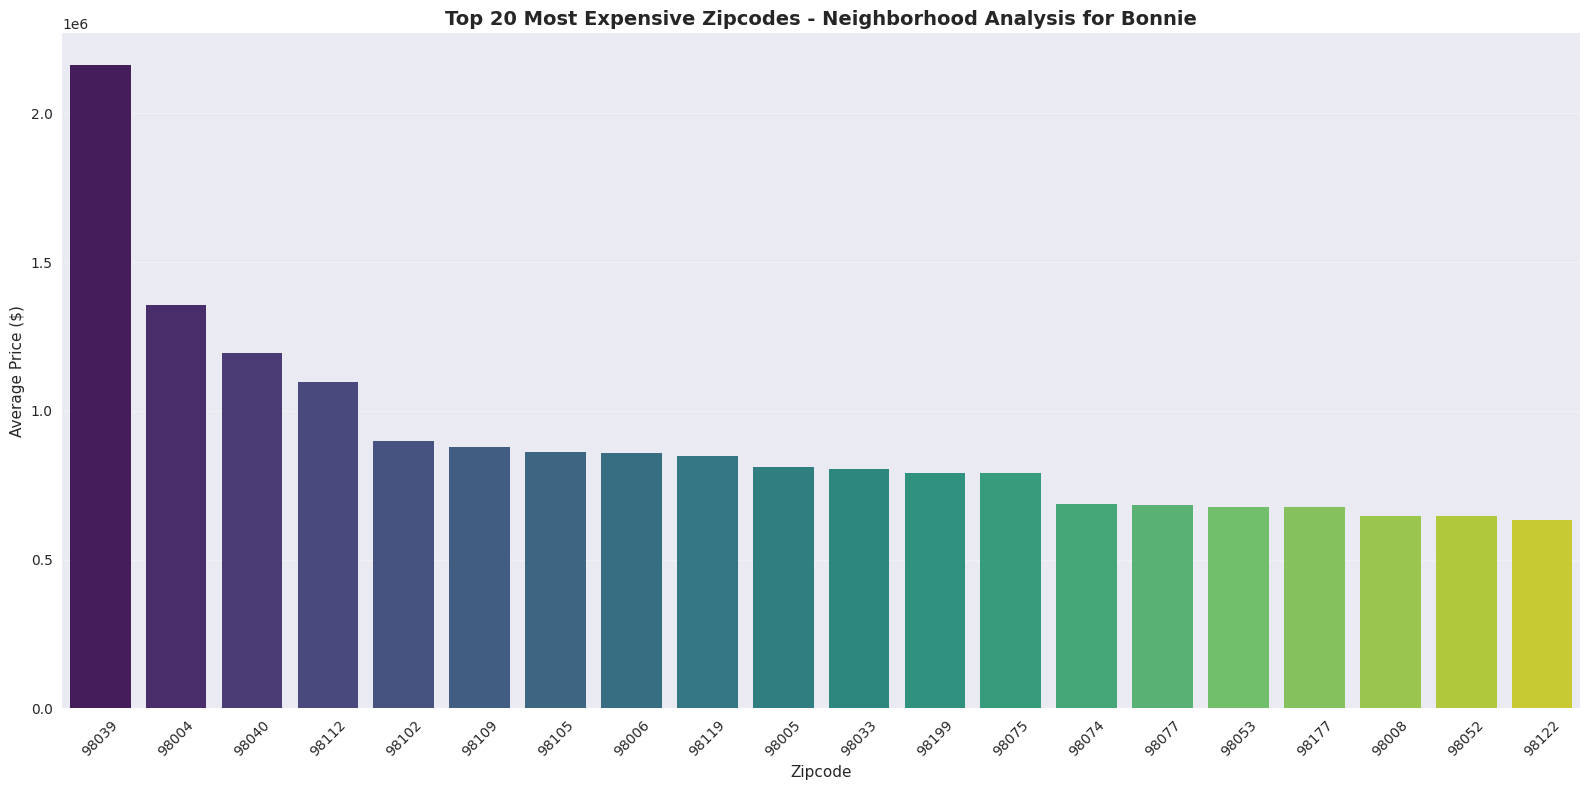


BEST MIDDLE CLASS NEIGHBORHOODS (by Value Score):


price_count  price_mean  value_score_mean  waterfront_mean  \
zipcode                                                               
98003             29   424941.21              3.42             0.00   
98023             52   427529.29              3.37             0.02   
98022             36   427808.31              3.30             0.00   
98092             77   424437.16              3.28             0.00   
98001             42   428925.62              3.23             0.00   
98070             41   444157.59              3.20             0.12   
98198             38   412579.21              3.19             0.03   
98042            109   413780.85              3.18             0.00   
98178             37   419678.38              3.18             0.00   
98030             40   413749.68              3.18             0.00   

         renovated_mean  
zipcode                  
98003              0.03  
98023              0.02  
98022              0.03  
98092              0.00  
98001              0.02  
98070              0.05  
98198              0.05  
98042              0.01  
98178              0.03  
98030              0.00

In [31]:
# neigbor analysis
# Bar plot for zipcode analysis
plt.figure(figsize=(16, 8))

# Get top 20 zipcodes by average price
top_zipcodes = bonnie_df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(20)

sns.barplot(
    x=top_zipcodes.index.astype(str),
    y=top_zipcodes.values,
    palette='viridis'
)

plt.xticks(rotation=45)
plt.title("Top 20 Most Expensive Zipcodes - Neighborhood Analysis for Bonnie", fontweight='bold', fontsize=14)
plt.ylabel("Average Price ($)")
plt.xlabel("Zipcode")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Middle class zipcode analysis
middle_class_zipcodes = middle_class.groupby('zipcode').agg({
    'price': ['count', 'mean'],
    'value_score': 'mean',
    'waterfront': 'mean',
    'renovated': 'mean'
}).round(2)

middle_class_zipcodes.columns = ['_'.join(col).strip() for col in middle_class_zipcodes.columns.values]
middle_class_zipcodes = middle_class_zipcodes.sort_values('value_score_mean', ascending=False)

print("\nBEST MIDDLE CLASS NEIGHBORHOODS (by Value Score):")
# print(middle_class_zipcodes.head(10))
middle_class_zipcodes.head(10)

##### 3.4. Geo plot

In [33]:
# plot
# Create color mapping for price tiers
tier_colors = {
    'Budget': COLOR_01,
    'Lower-Middle': COLOR_07,
    'Middle-Class-1': COLOR_03,  # Highlight Bonnie's target
    'Middle-Class-2': COLOR_06,  # Highlight Bonnie's target
    'Upper-Middle': COLOR_07,
    'Luxury': COLOR_05
}
# Create the map
fig = px.scatter_map(
    bonnie_df,
    lat='lat',
    lon='long',
    color='price_tier',
    size='price',
    size_max=15,
    hover_data={
        'house_id': True,
        'price': ':,.0f',
        'sqft_living': True,
        'zipcode': True,
        'waterfront': True,
        'renovated': True,
        'condition': True,
        'view': True
    },
    zoom=9,
    height=700,
    color_discrete_map=tier_colors,
    title='King County Housing: Price Tiers & Market Opportunities'
)

# Style by tier
for trace in fig.data:
    tier = trace.name
    if tier == 'Middle-Class-1':
        trace.marker.opacity = 0.9
        trace.marker.sizemin = 8
    elif tier == 'Middle-Class-2':
        trace.marker.opacity = 0.8
        trace.marker.sizemin = 6
    else:
        trace.marker.opacity = 0.5 if tier == 'Budget' else 0.7
        trace.marker.sizemin = 4

fig.update_layout(
    mapbox_style='open-street-map',
    legend_title_text='Price Tier',
    title_x=0.5
)

# Add Bonnie's target market statistics
total_middle = len(
    bonnie_df[
        (bonnie_df['price_tier'] == 'Middle-Class-1') | 
        (bonnie_df['price_tier'] == 'Middle-Class-2')
    ])
avg_price_middle = bonnie_df[
    (bonnie_df['price_tier'] == 'Middle-Class-1') | 
    (bonnie_df['price_tier'] == 'Middle-Class-2')]['price'].mean()

fig.add_annotation(
    text=f"Middle-Class (1 and 2) Market:<br>{total_middle:,} houses<br>Avg: ${avg_price_middle:,.0f}",
    x=0.2, y=0.78, xref="paper", yref="paper",
    bgcolor="rgba(180,28,70,0.7)", bordercolor="black", font=dict(color="white")
)
# pio.kaleido.scope.mathjax = None
# fig.write_image(fig, os.path.join(OUTPUT_DIR, 'geo_map_plot.png'))
# fig.write_image(fig, os.path.join(OUTPUT_DIR, 'geo_map_plot.jpeg'))
# fig.write_image(fig, os.path.join(OUTPUT_DIR, 'geo_map_plot.pdf'))
# fig.write_image(fig, os.path.join(OUTPUT_DIR, 'geo_map_plot.svg'))
# plotly.offline.plot(fig, filename=os.path.join(OUTPUT_DIR, 'geo_map_plot.html'))
fig.show()

### 4. Explain / Summary

In [ ]:
# Profi analysis
# Renovation impact
renovation_impact = bonnie_df.groupby('renovated')['price'].mean()
print(f"Price premium for renovated houses: ${renovation_impact[True] - renovation_impact[False]:,.0f}")

# Waterfront premium
waterfront_impact = bonnie_df.groupby('waterfront')['price'].mean()
print(f"Waterfront premium: ${waterfront_impact[1] - waterfront_impact[0]:,.0f}")

# Grade impact
grade_impact = bonnie_df.groupby('grade')['price'].mean()
print(f"Price increase per grade level: ~${(grade_impact.diff().mean()):,.0f}")

# Size vs Price correlation
size_price_corr = bonnie_df['sqft_living'].corr(bonnie_df['price'])
print(f"Size-Price correlation: {size_price_corr:.3f} (Strong positive relationship)")

Price premium for renovated houses: $236,762
Waterfront premium: $1,184,929
Price increase per grade level: ~$344,877
Size-Price correlation: 0.702 (Strong positive relationship)


In [ ]:
# Generate final summary report
print("\n" + "="*60)
print("FINAL RECOMMENDATIONS FOR BONNIE BROWN")
print("="*60)

print("\nTARGET PROFILE:")
print(f"   - Price Range: ${bonnie_df['price'].quantile(0.33):,.0f} - ${bonnie_df['price'].quantile(0.66):,.0f}")
print(f"   - Focus: Middle class neighborhoods with high value scores")
print(f"   - Priority: Good condition, potential for value appreciation")


FINAL RECOMMENDATIONS FOR BONNIE BROWN

TARGET PROFILE:
   - Price Range: $360,000 - $560,000
   - Focus: Middle class neighborhoods with high value scores
   - Priority: Good condition, potential for value appreciation


In [34]:
# Recommandations
print("\nKEY INSIGHTS:")
print("   1. Focus on houses with grades 7-8 for best value")
print("   2. Prioritize renovated properties for immediate move-in")
print("   3. Waterfront properties command significant premiums")
print("   4. Larger living areas strongly correlate with higher prices")
print("   5. Consider properties with good view scores for better resale")

print("\nRISK MITIGATION:")
print("   - Avoid lowest condition scores (1-2)")
print("   - Verify renovation quality and permits")
print("   - Consider proximity to amenities and transportation")
print("   - Check flood zones for waterfront properties")


KEY INSIGHTS:
   1. Focus on houses with grades 7-8 for best value
   2. Prioritize renovated properties for immediate move-in
   3. Waterfront properties command significant premiums
   4. Larger living areas strongly correlate with higher prices
   5. Consider properties with good view scores for better resale

RISK MITIGATION:
   - Avoid lowest condition scores (1-2)
   - Verify renovation quality and permits
   - Consider proximity to amenities and transportation
   - Check flood zones for waterfront properties


In [ ]:
print("="*50)
print("TOP 3 RECOMMENDED ZIPCODES:")
print("="*50)
top_zipcodes_list = middle_class_zipcodes.head(3).index.tolist()
for i, zipcode in enumerate(top_zipcodes_list, 1):
    zip_data = middle_class_zipcodes.loc[zipcode]
    print(f"   {i}. Zipcode {zipcode}:")
    print(f"      Avg Value Score: {zip_data['value_score_mean']:.2f}")
    print(f"      Avg Price: ${zip_data['price_mean']:,.0f}")
    print(f"      Renovation Rate: {zip_data['renovated_mean']:.1%}")
    print()

TOP 3 RECOMMENDED ZIPCODES:
   1. Zipcode 98003:
      Avg Value Score: 3.42
      Avg Price: $424,941
      Renovation Rate: 3.0%

   2. Zipcode 98023:
      Avg Value Score: 3.37
      Avg Price: $427,529
      Renovation Rate: 2.0%

   3. Zipcode 98022:
      Avg Value Score: 3.30
      Avg Price: $427,808
      Renovation Rate: 3.0%



In [ ]:
# Test your geographical hypothesis
print("\nGEOGRAPHICAL HYPOTHESIS TESTING:")
# Calculate distance from city center (approximate center)
center_lat = bonnie_df['lat'].mean()
center_lon = bonnie_df['long'].mean()

bonnie_df['distance_from_center'] = np.sqrt(
    (bonnie_df['lat'] - center_lat)**2 + 
    (bonnie_df['long'] - center_lon)**2
)

distance_price_corr = bonnie_df['distance_from_center'].corr(bonnie_df['price'])
print(f"Distance from center vs Price correlation: {distance_price_corr:.3f}")

if distance_price_corr < 0:
    print("CONFIRMED: Closer to center = More expensive")
else:
    print("REJECTED: No clear center premium detected")

# Test size hypothesis
print(f"\nSIZE HYPOTHESIS: Correlation = {size_price_corr:.3f}")
if size_price_corr > 0.5:
    print("STRONGLY CONFIRMED: Larger houses = More expensive")
elif size_price_corr > 0.3:
    print("MODERATELY CONFIRMED: Size affects price")
else:
    print("WEAK RELATIONSHIP: Size has limited impact")


GEOGRAPHICAL HYPOTHESIS TESTING:
Distance from center vs Price correlation: -0.247
CONFIRMED: Closer to center = More expensive

SIZE HYPOTHESIS: Correlation = 0.702
STRONGLY CONFIRMED: Larger houses = More expensive


In [ ]:
print("="*60)
print("🔬 TESTABLE HYPOTHESES FOR BONNIE BROWN")
print("="*60)

# "hypothesis": "Waterfront houses command a 40%+ premium in middle-class neighborhoods"
# res: Bonnie should prioritize non-waterfront for volume or waterfront for margin
bonnie_df[(bonnie_df['price_tier']=='Middle-Class-1') | (bonnie_df['price_tier']=='Middle-Class-2')].groupby('waterfront')['price'].mean()

🔬 TESTABLE HYPOTHESES FOR BONNIE BROWN


waterfront
0    435740.753005
1    435362.500000
Name: price, dtype: float64

In [ ]:
# "hypothesis": "Renovated houses sell 30-50% higher than non-renovated in same zipcode"
bonnie_df.groupby(['zipcode', 'renovated'])['price'].median().unstack().head()

renovated      False      True 
zipcode                        
98001       260000.0   203000.0
98002       235000.0   238000.0
98003       266500.0   369500.0
98004      1100000.0  1445000.0
98005       761225.0   891325.0